In [34]:
from db import fetch

from tqdm import tqdm
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

plt.style.use("ggplot")
%matplotlib inline

In [18]:
query = """
select contests.id, contests.__updatetime, contests.type, contests_plrsbefore.plr, contests.winner, contests.loser, contests_plrsbefore.userid, contests.status
from contests 
inner join contests_plrsbefore 
on contests.id = contests_plrsbefore.contests_id
where contests.console_game = 'ps4-nba21'
"""

In [19]:
df = fetch(query)
df.shape

(69494, 8)

In [20]:
df.head()

,id,__updatetime,type,plr,winner,loser,userid,status
0,2243988808407448,2020-09-04 05:12:16.797,H,50,6.210912e+14,3.559349e+15,621091246611789,completed
1,2156599449300926,2020-09-04 05:12:16.797,H,55,NaN,NaN,4208838072140441,cancelled
2,3327488311065932,2020-09-04 05:12:16.797,H,49,NaN,NaN,8023059477777343,cancelled
3,4140778429694488,2020-09-04 05:12:16.797,H,71,6.573307e+15,7.090778e+15,7090777804695185,completed
4,4496887499213898,2020-09-04 05:12:16.797,H,69,NaN,NaN,1041621141461443,cancelled


In [32]:
# k = userid, v = List[Int]

lookup = {}  

for _, row in tqdm(df.iterrows()):
    if row['status'] != "completed" or row['type'] != 'H':
        pass
    else:
        if row['userid'] not in lookup.keys():
            if row['userid'] == row['winner']:
                lookup[row['userid']] = [1]
            else:
                lookup[row['userid']] = [0]
        else:
            if row['userid'] == row['winner']:
                lookup[row['userid']].append(1)
            else:
                lookup[row['userid']].append(0)

69494it [00:08, 8051.24it/s]


In [41]:
# calculate winning percentage for each user
winning_percentage = []
games_played = []

for v in lookup.values():
    winning_percentage.append(np.mean(v))
    games_played.append(len(v))

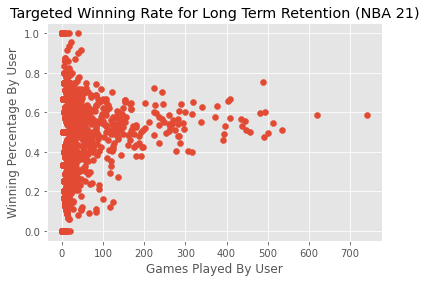

In [42]:
plt.title('Targeted Winning Rate for Long Term Retention (NBA 21)')
plt.ylabel('Winning Percentage By User')
plt.xlabel('Games Played By User')
plt.scatter(games_played, winning_percentage)